In [18]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [19]:
# Load the Dataset
df = pd.read_csv('/content/tmdb-movies.csv')


In [20]:
# Initial Exploration
print(df.head())
print(df.info())
print(df.describe())

       id    imdb_id  popularity     budget     revenue  \
0  135397  tt0369610   32.985763  150000000  1513528810   
1   76341  tt1392190   28.419936  150000000   378436354   
2  262500  tt2908446   13.112507  110000000   295238201   
3  140607  tt2488496   11.173104  200000000  2068178225   
4  168259  tt2820852    9.335014  190000000  1506249360   

                 original_title  \
0                Jurassic World   
1            Mad Max: Fury Road   
2                     Insurgent   
3  Star Wars: The Force Awakens   
4                     Furious 7   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3  Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
4  Vin Diesel|Paul Walker|Jason Statham|Michelle ...   

                                            homepage          director  \
0                      

In [21]:
# Data Cleaning
# Drop irrelevant or duplicate columns
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords'], axis=1, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Handle missing values
df.fillna({'genres': 'Unknown', 'cast': 'Unknown', 'director': 'Unknown', 'overview': ''}, inplace=True)

In [22]:
# Add derived columns
df['profit'] = df['revenue'] - df['budget']
df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

<ipython-input-22-416885436357>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
<ipython-input-22-416885436357>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month


Exploratory Data Analysis

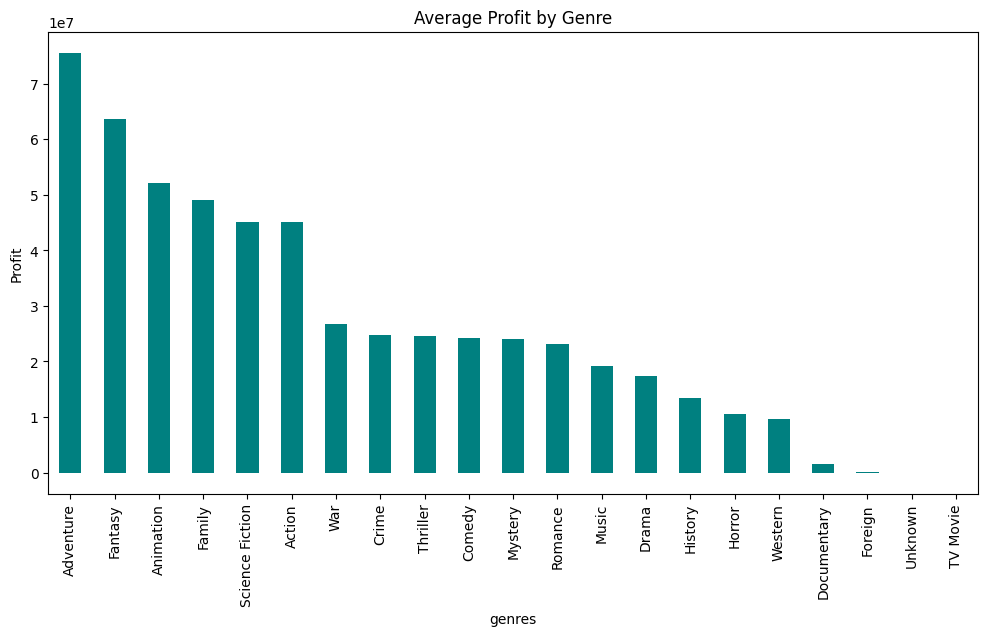

In [23]:
## 1. Most Profitable Genres
df['genres'] = df['genres'].str.split('|')
profit_per_genre = df.explode('genres').groupby('genres')['profit'].mean()

plt.figure(figsize=(12, 6))
profit_per_genre.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title('Average Profit by Genre')
plt.ylabel('Profit')
plt.show()

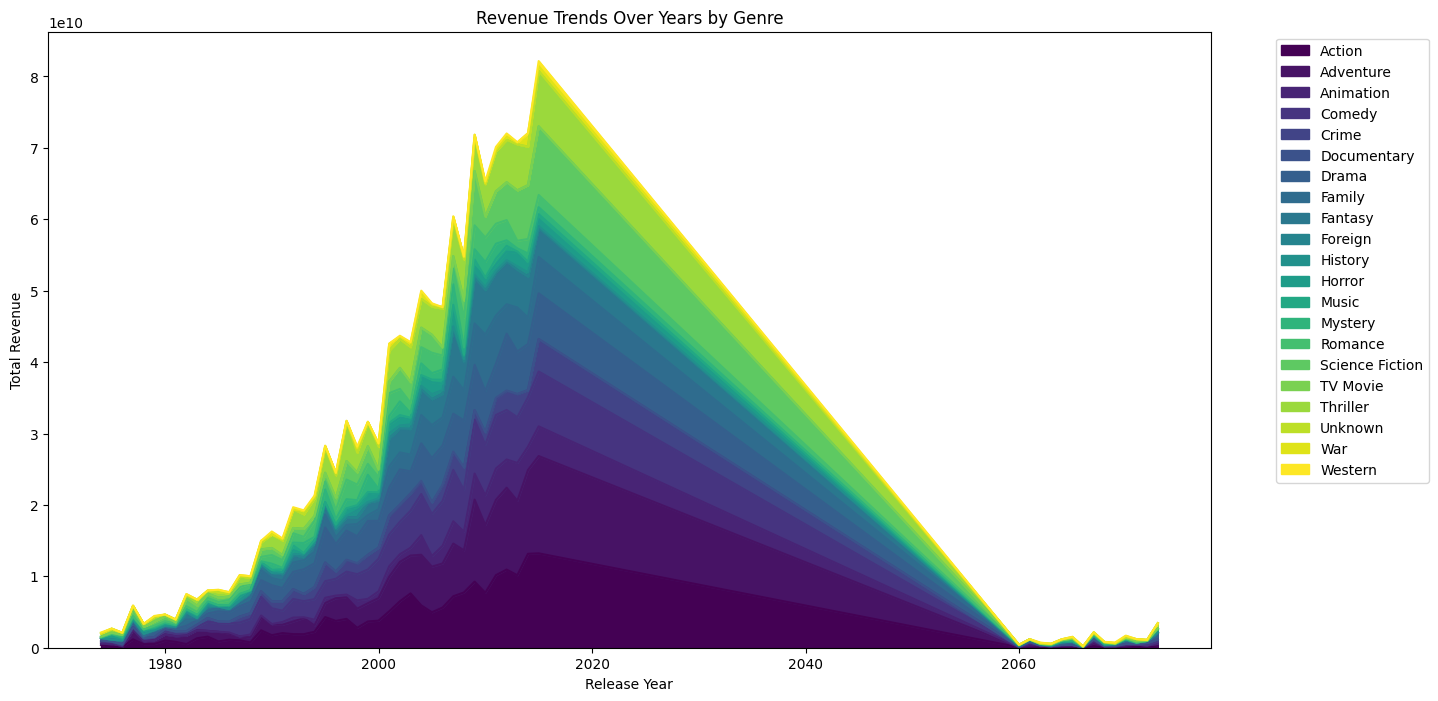

In [24]:
## 2. Revenue Trends by Year and Genre
revenue_trends = df.explode('genres').groupby(['release_year', 'genres'])['revenue'].sum().unstack()
revenue_trends.fillna(0).plot(kind='area', figsize=(15, 8), stacked=True, colormap='viridis')
plt.title('Revenue Trends Over Years by Genre')
plt.ylabel('Total Revenue')
plt.xlabel('Release Year')
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

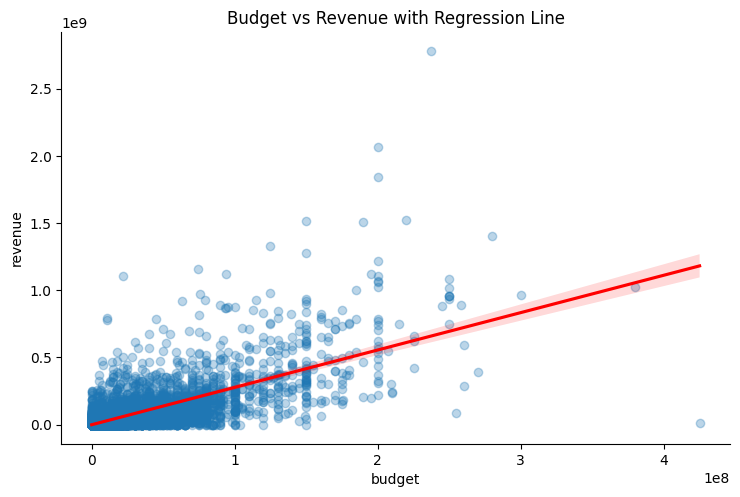

In [26]:
## 3. Budget vs Revenue Correlation
sns.lmplot(data=df, x='budget', y='revenue', aspect=1.5, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Budget vs Revenue with Regression Line')
plt.show()


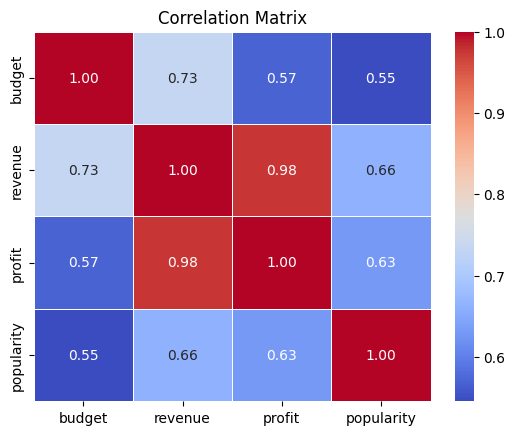

In [27]:
#Correlation matrix
corr = df[['budget', 'revenue', 'profit', 'popularity']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

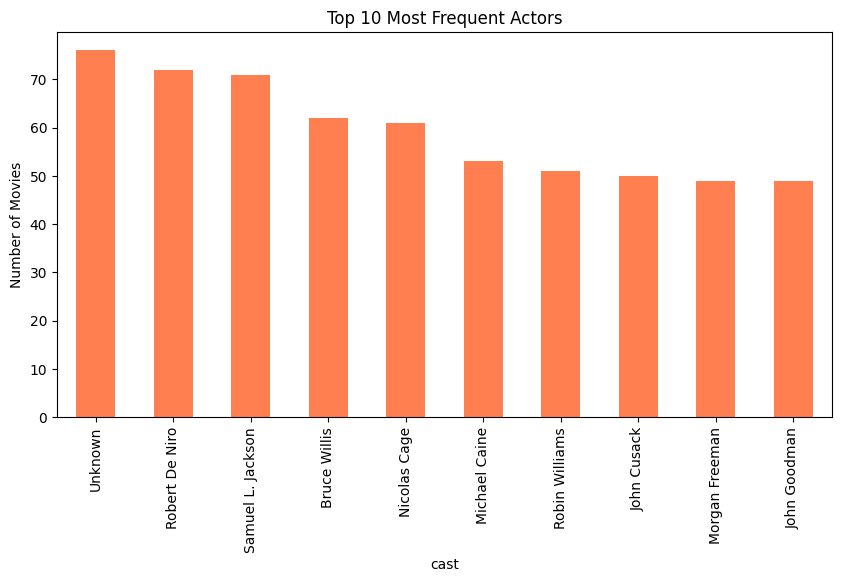

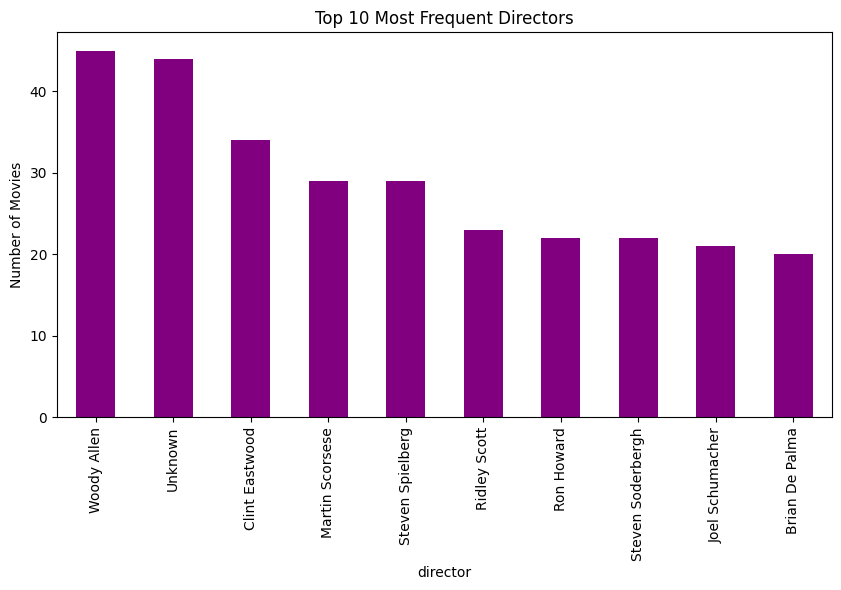

In [28]:
## 4. Top Actors and Directors
top_actors = df['cast'].str.split('|').explode().value_counts().head(10)
top_directors = df['director'].value_counts().head(10)

plt.figure(figsize=(10, 5))
top_actors.plot(kind='bar', color='coral', title='Top 10 Most Frequent Actors')
plt.ylabel('Number of Movies')
plt.show()

plt.figure(figsize=(10, 5))
top_directors.plot(kind='bar', color='purple', title='Top 10 Most Frequent Directors')
plt.ylabel('Number of Movies')
plt.show()

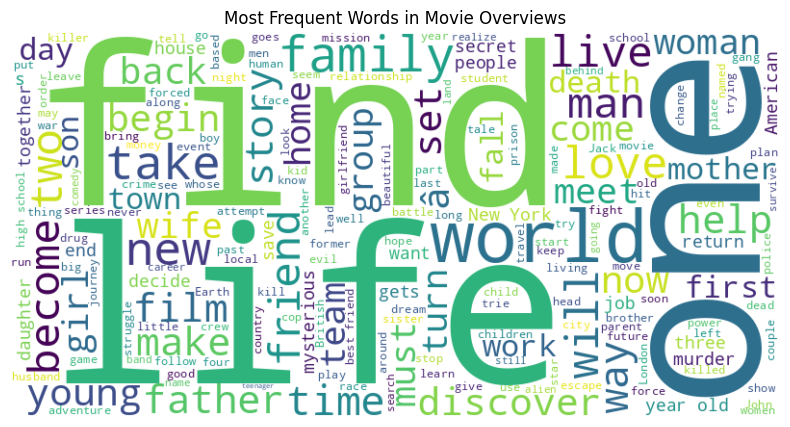

In [29]:
## 5. Word Cloud for Movie Overviews
text = ' '.join(df['overview'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Movie Overviews')
plt.show()

**Predictive Modeling: Predict Revenue**

Mean Squared Error: 5167406789320139.0


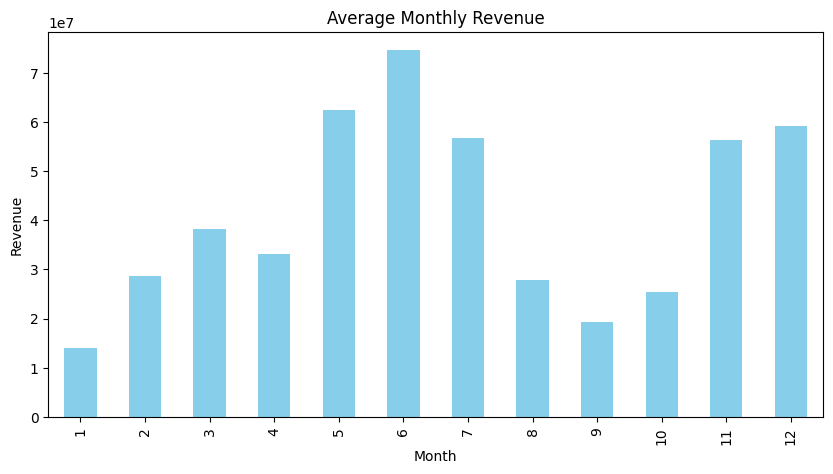

In [33]:
# Feature Selection
features = df[['budget', 'popularity', 'runtime', 'release_year']].fillna(0)
target = df['revenue'].fillna(0)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

#Monthly Revenue Analysis
monthly_revenue = df.groupby('release_month')['revenue'].mean()

plt.figure(figsize=(10, 5))
monthly_revenue.plot(kind='bar', title='Average Monthly Revenue', color='skyblue')
plt.ylabel('Revenue')
plt.xlabel('Month')
plt.show()